In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch

In [2]:
# Load the dataset
top_venues_ll = pd.read_csv('nyc_frequent_cat_location.csv')
top_venues_ll.head(3)

,Neighborhood,1st,2nd,3rd,4th,5th,Borough,Latitude_y,Longitude_y
0,Wakefield,51,0,0,0,0,Bronx,40.894705,-73.847201
1,Co-op City,57,56,53,47,52,Bronx,40.874294,-73.829939
2,Fieldston,57,56,39,31,49,Bronx,40.895437,-73.905643


In [3]:
# Drop categorical data and coordinates
top_ven_num = top_venues_ll.drop(['Neighborhood', 'Borough', 'Latitude_y', 'Longitude_y'], axis=1)

In [4]:
# Single out coordinates for cluster plot
X = top_venues_ll[['Longitude_y', 'Latitude_y']]

In [5]:
# Scale data using MinMaxScaler
scaler = MinMaxScaler()
 
# Create a scaled data frame
scaled_data = scaler.fit_transform(top_ven_num)

In [8]:
def plot_dendrogram(X, method='ward'):
    """
    Performs hierarchichal clustering and plots a dendrogram. 
    Input parameters are the dataframe X and method for calculating distances
    between different clusters.
    """

    # create dendrogram using sch
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    
    # add features
    plt.title('Dendrogram')
    plt.ylabel('Euclidean Distances')
    plt.xlabel('Points')
    plt.xticks([])
    plt.show()
    #plt.savefig('')

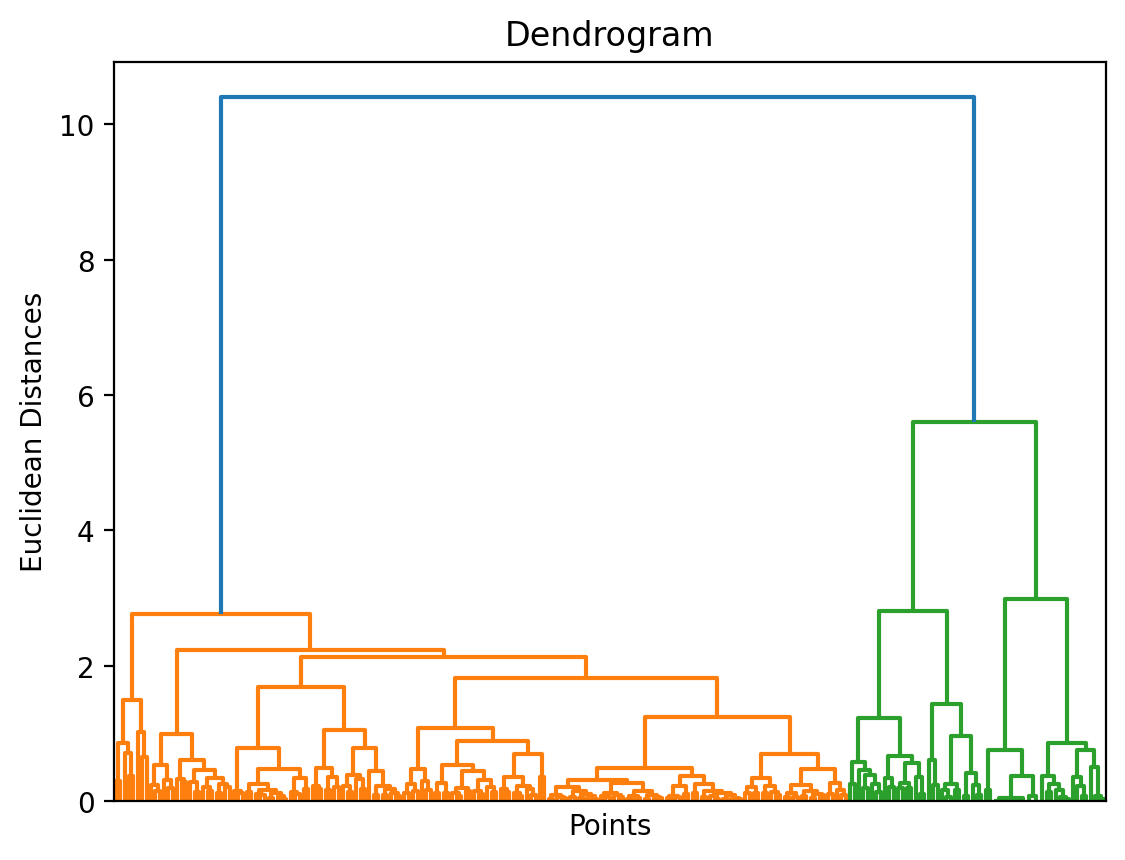

In [9]:
# Plot dendrogram
plot_dendrogram(scaled_data)

In [12]:
# Instatiate AgglomerativeClustering with parameters from dendrogram
ac = AgglomerativeClustering(affinity='euclidean',
                            linkage='ward',
                            n_clusters=2)

# now let's fit and predict the data
y_hc = ac.fit_predict(scaled_data)

In [13]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    """
    Creates a plot showing how the clustering algorithm assigned the clusters to
    input data. 
    """
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1] # Changed to 0 because data is 1D
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.title('Hierarchical Clustering by Facility Type Frequency')
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.show()
    #plt.savefig('hierarchical_clustering.png')

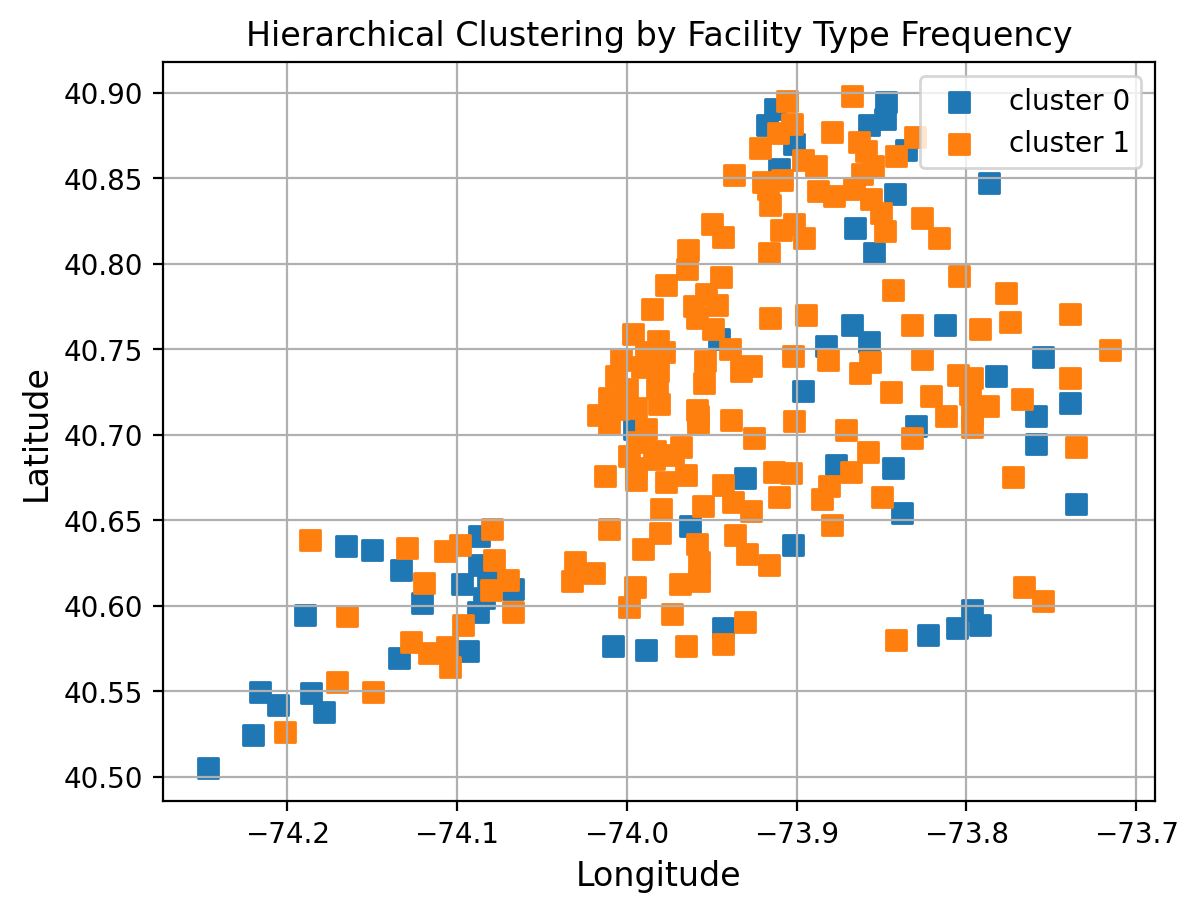

In [14]:
plot_clusters(X.to_numpy(), y_hc)